# Steam App Details Dataset

In [2]:
from datetime import date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import json
import ast
import time

In [23]:
df_steam = pd.read_csv('./clean_datasets/steam.csv', index_col=0)
df_steam_tags = pd.read_csv('./clean_datasets/steamspy_tag_data.csv', index_col=0)
df_steam_requirements = pd.read_csv('./clean_datasets/steam_requirements_data.csv', index_col=0)
df_steam_descriptions = pd.read_csv('./clean_datasets/steam_description_data.csv', index_col=0)
df_steam_support = pd.read_csv('./clean_datasets/steam_support_info.csv', index_col=0)
df_steam_achievements = pd.read_csv('./clean_datasets/steam_achievements.csv')

In [24]:
df_steam.head()

,name,release_date,english,developer,publisher,required_age,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,windows,linux,mac
appid,,,,,,,,,,,,,,,
10,Counter-Strike,01/11/2000,True,Valve,Valve,0,124534,3339,17612,317,"[10000000, 20000000]",7.19,True,True,True
20,Team Fortress Classic,01/04/1999,True,Valve,Valve,0,3318,633,277,62,"[5000000, 10000000]",3.99,True,True,True
30,Day of Defeat,01/05/2003,True,Valve,Valve,0,3416,398,187,34,"[5000000, 10000000]",3.99,True,True,True
40,Deathmatch Classic,01/06/2001,True,Valve,Valve,0,1273,267,258,184,"[5000000, 10000000]",3.99,True,True,True
50,Half-Life: Opposing Force,01/11/1999,True,Gearbox Software,Valve,0,5250,288,624,415,"[5000000, 10000000]",3.99,True,True,True


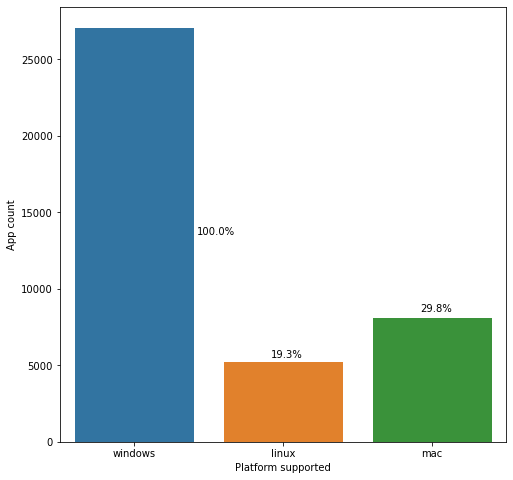

In [66]:
plt.figure(figsize=(8, 8))

df_plats = df_steam.drop(columns=['name', 'release_date', 'english', 'developer', 'publisher', 'required_age', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'owners', 'price'])

df2 = df_plats.melt(value_vars=df_plats.columns)
df2 = df2[df2["value"] != False]
plats_plot = sb.countplot(data=df2, x="variable")
plats_plot.set(xlabel='Platform supported', ylabel='App count')

total = len(df_plats['windows'])

patchWindows = plats_plot.patches[0]
percentage = '{:.1f}%'.format(100 * patchWindows.get_height() / total)
x = patchWindows.get_x() + patchWindows.get_width() + 0.02
y = patchWindows.get_y() + patchWindows.get_height() / 2
plats_plot.annotate(percentage, (x, y))

patchLinux = plats_plot.patches[1]
percentage = '{:.1f}%'.format(100 * patchLinux.get_height() / total)
x = patchLinux.get_x() + patchLinux.get_width() / 2 - 0.08
y = patchLinux.get_y() + patchLinux.get_height() * 1.05
plats_plot.annotate(percentage, (x, y))

patchMac = plats_plot.patches[2]
percentage = '{:.1f}%'.format(100 * patchMac.get_height() / total)
x = patchMac.get_x() + patchMac.get_width() / 2 - 0.08
y = patchMac.get_y() + patchMac.get_height() * 1.05
plats_plot.annotate(percentage, (x, y))

plt.show()